# Birds Strikes Analysis Using Python


## Importing libraries and dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("C:\\Users\\hp\Desktop\\projects\\UMSV\\projects assigned\Bird_Strikes_data.xlsx")

## Data Preprocessing:

In [3]:
data.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [4]:
data = data.drop_duplicates()
data.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23479
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23542
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [5]:
data=data.drop(columns=["Remarks","Conditions: Precipitation"])

In [6]:
delete_empty_cells= ["Aircraft: Type","Airport: Name","Altitude bin","Wildlife: Number struck","When: Phase of flight","Pilot warned of birds or wildlife?","Is Aircraft Large?"]
data.dropna(subset=delete_empty_cells,inplace=True)
data.isnull().sum()

Record ID                                      0
Aircraft: Type                                 0
Airport: Name                                  0
Altitude bin                                   0
Aircraft: Make/Model                           0
Wildlife: Number struck                        0
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23350
FlightDate                                     0
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 234
Aircraft: Airline/Operator                     0
Origin State                                 449
When: Phase of flight                          0
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Wildlife: Size                                 0
Conditions: Sky                                0
Wildlife: Species                              0
Pilot warned of birds or wildlife?             0
Cost: Total $       

In [7]:
data['Origin State'].fillna('Unknown',inplace=True)
data['Aircraft: Number of engines?'].fillna(data['Aircraft: Number of engines?'].mode()[0], inplace=True)
data['Effect: Impact to flight'] = data['Effect: Impact to flight'].replace({ np.nan: 'Not Known'}).astype('category')

data.isnull().sum()

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Total $                              0
Feet above ground                          0
Number of 

In [8]:
data.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,False,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,Not Known,2001-07-25,Caused damage,...,False,False,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,Not Known,2001-09-14,No damage,...,False,False,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,True,False,Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,Not Known,2003-06-23,No damage,...,False,False,Small,No Cloud,European starling,N,0,50.0,0,No


## Data Visualisation ⚓:

### Q1. Visuals depicting the number of bird strikes

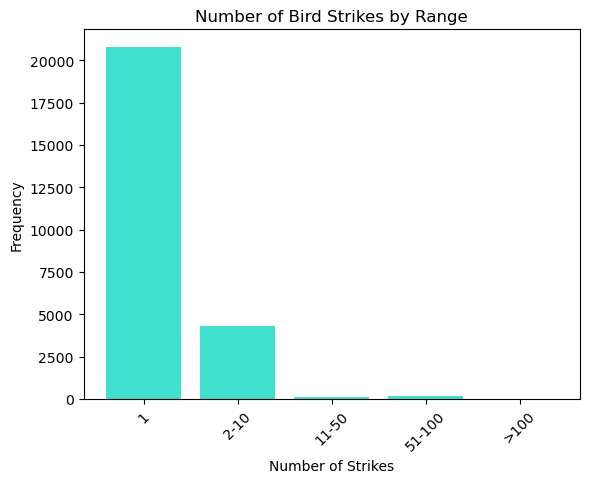

In [10]:
bins = [0, 1, 10, 50, 100, data['Wildlife: Number Struck Actual'].max()]
labels = ['1', '2-10', '11-50', '51-100', '>100']

# Grouping data into bins
data['Strike Range'] = pd.cut(data['Wildlife: Number Struck Actual'], bins=bins, labels=labels)

# Count occurrences in each bin
strike_counts = data['Strike Range'].value_counts().sort_index()

plt.bar(strike_counts.index, strike_counts.values, color='turquoise')
plt.title('Number of Bird Strikes by Range')
plt.xlabel('Number of Strikes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Q2. Yearly analysis of the bird strikes in the US

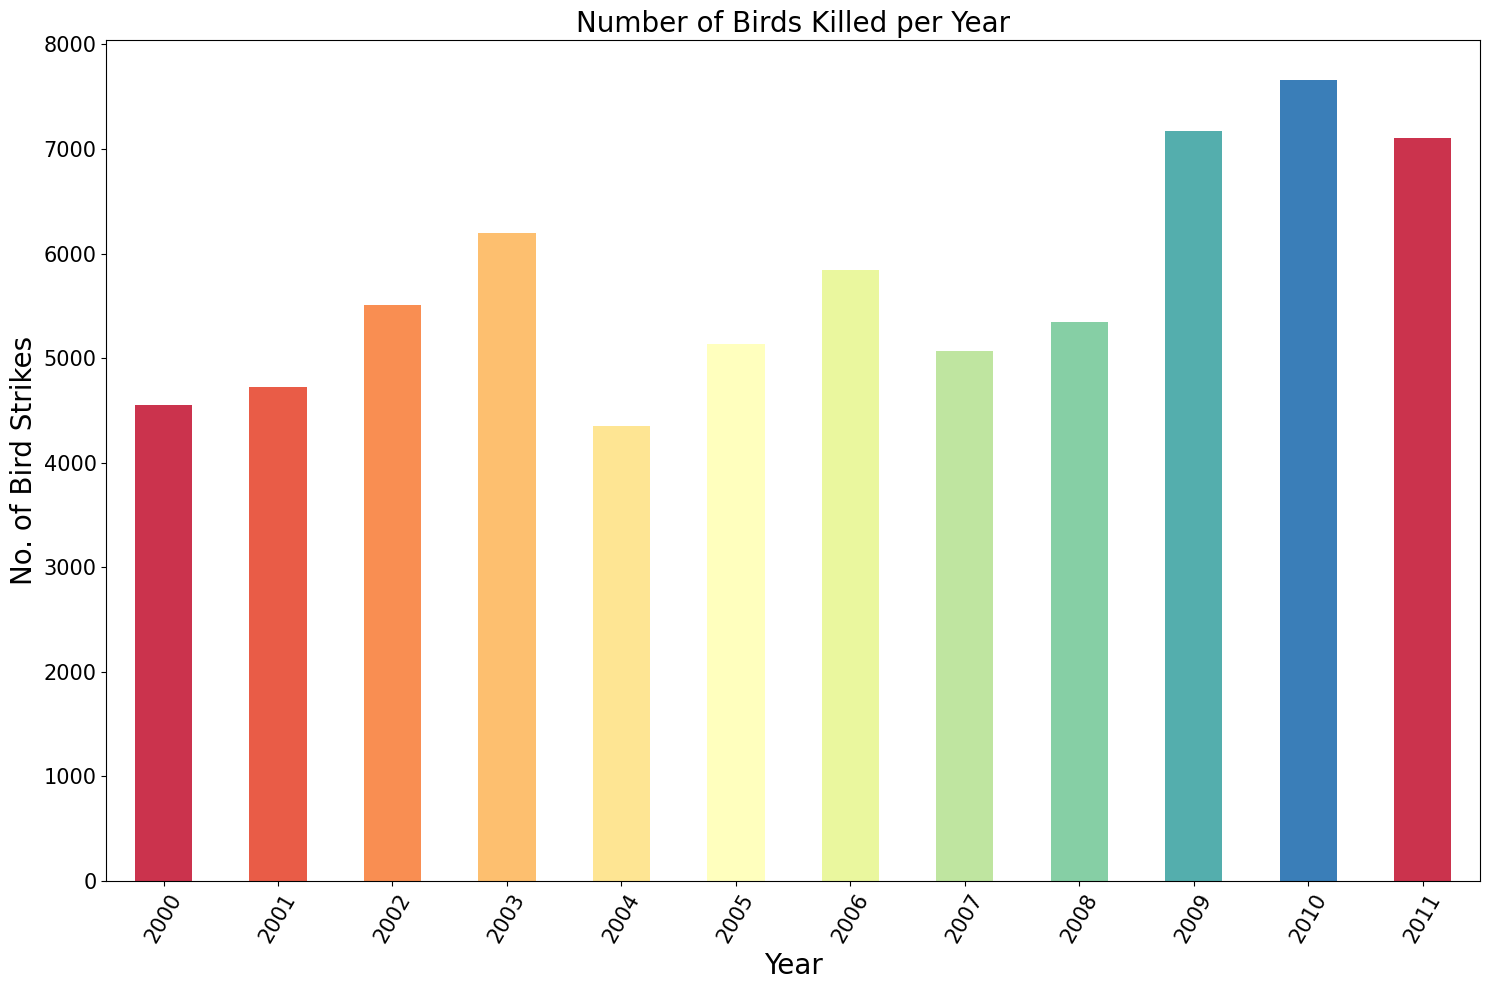

In [13]:
# Extracting year from the 'date' column
data['year'] = data['FlightDate'].astype(str).apply(lambda x:x.split('-')[0])

# Group by 'year' and sum the 'birds_killed'
yearly_data = data.groupby('year')['Wildlife: Number Struck Actual'].sum()

plt.figure(figsize=(15, 10))
yearly_data.plot(kind='bar',color=sns.color_palette("Spectral",11))
plt.title('Number of Birds Killed per Year',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('No. of Bird Strikes',fontsize=20)
plt.xticks(fontsize=15,rotation=60)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()


### Q3. Top 10 US airlines in terms of having encountered bird strikes

In [14]:
top_airlines = data.groupby('Aircraft: Airline/Operator')['Wildlife: Number Struck Actual'].sum().reset_index()
top10 = top_airlines.nlargest(10,'Wildlife: Number Struck Actual')[['Aircraft: Airline/Operator','Wildlife: Number Struck Actual']]
print(top10)

    Aircraft: Airline/Operator  Wildlife: Number Struck Actual
69                    BUSINESS                            9330
250         SOUTHWEST AIRLINES                            9208
45           AMERICAN AIRLINES                            6107
112            DELTA AIR LINES                            3911
274                US AIRWAYS*                            3377
46     AMERICAN EAGLE AIRLINES                            2763
100            COMAIR AIRLINES                            1986
269            UNITED AIRLINES                            1930
246           SKYWEST AIRLINES                            1920
166            JETBLUE AIRWAYS                            1562


### Q4. Airports with the most incidents of bird strikes- Top50

In [16]:
top_airlines = data.groupby('Airport: Name')['Wildlife: Number Struck Actual'].sum().reset_index()
top50 = top_airlines.nlargest(50,'Wildlife: Number Struck Actual')[['Airport: Name','Wildlife: Number Struck Actual']]
print(top50)

                               Airport: Name  Wildlife: Number Struck Actual
208              DALLAS/FORT WORTH INTL ARPT                            2933
875                          SACRAMENTO INTL                            1856
530                             LAGUARDIA NY                            1579
783                        PHILADELPHIA INTL                            1396
882                      SALT LAKE CITY INTL                            1376
886                  SAN FRANCISCO INTL ARPT                            1210
479                      JOHN F KENNEDY INTL                            1207
911                      SEATTLE-TACOMA INTL                            1181
714                             NORFOLK INTL                            1119
52                       BALTIMORE WASH INTL                            1027
696                           NASHVILLE INTL                            1003
570                               LOGAN INTL                             962

### Q5.  Yearly Cost Incurred due to Bird Strikes

In [17]:
yearly_cost = data.groupby('year')['Cost: Total $'].sum()
yearly_cost.name='Total cost'
print(yearly_cost)

year
2000     5625496
2001    23252168
2002     9046405
2003    13176787
2004     8116866
2005     7026670
2006    18309903
2007    10822426
2008    11966121
2009     9564327
2010    11459879
2011    13180130
Name: Total cost, dtype: int64


### Q6. When do most bird strikes occur?


  When: Phase of flight  Wildlife: Number Struck Actual
0              Approach                           24558



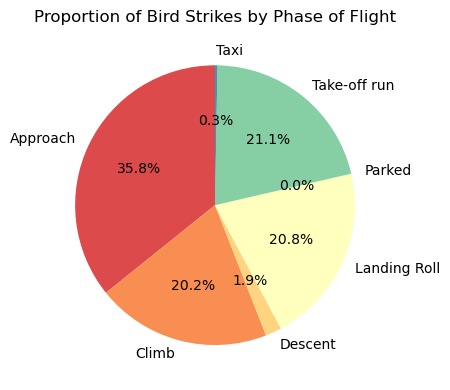

In [21]:
most_strikes = data.groupby('When: Phase of flight')['Wildlife: Number Struck Actual'].sum().reset_index()
top_reason=most_strikes.nlargest(1,'Wildlife: Number Struck Actual')[['When: Phase of flight','Wildlife: Number Struck Actual']]
print(top_reason)

print()

plt.figure(figsize=(6,4))
plt.pie(most_strikes['Wildlife: Number Struck Actual'],  
        labels=most_strikes['When: Phase of flight'],    
        autopct='%1.1f%%',                               
        startangle=90,                                   
        colors=sns.color_palette("Spectral", len(most_strikes)) 
)
plt.title('Proportion of Bird Strikes by Phase of Flight')
plt.tight_layout()
plt.show()

### Q7. Altitude of aeroplanes at the time of strike


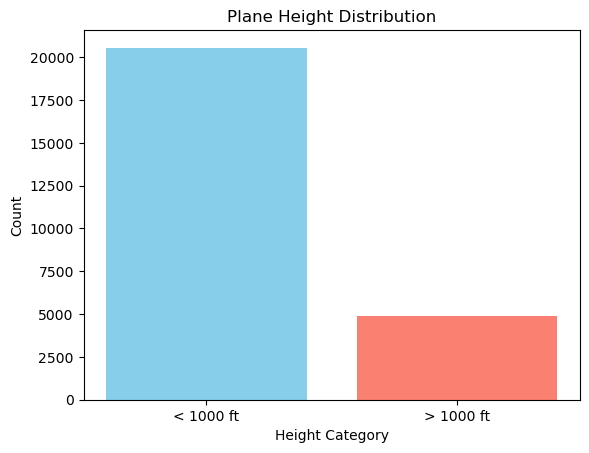

In [22]:
height_counts = data['Altitude bin'].value_counts()

plt.bar(height_counts.index, height_counts.values, color=['skyblue', 'salmon'])
plt.title('Plane Height Distribution')
plt.xlabel('Height Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

### Q8. Phase of flight at the time of the strike

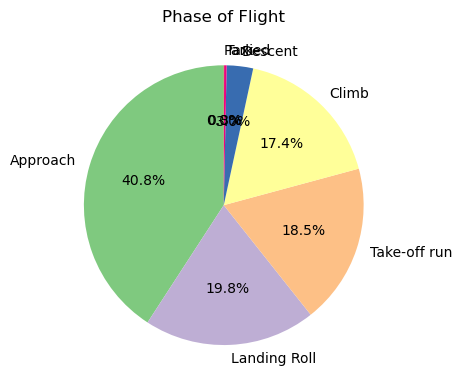

In [24]:
plt.figure(figsize=(6, 4))
phase_counts = data['When: Phase of flight'].value_counts()
plt.pie( phase_counts, 
    labels=phase_counts.index, #same as legends in PowerBI 
    autopct='%1.1f%%',  
    startangle=90,  
    colors=sns.color_palette("Accent", len(phase_counts))  )

plt.title('Phase of Flight')
plt.tight_layout()
plt.show()

### Q9. Average Altitude of the aeroplanes in different phases at the time of strike

In [25]:
avg_altitude = round(data.groupby('When: Phase of flight')['Feet above ground'].mean().reset_index(),2)
print(avg_altitude)

  When: Phase of flight  Feet above ground
0              Approach            1001.73
1                 Climb            1199.65
2               Descent            5936.46
3          Landing Roll               0.00
4                Parked               0.00
5          Take-off run               0.10
6                  Taxi               0.00


### Q10.  Effect of Bird Strikes & Impact on Flight


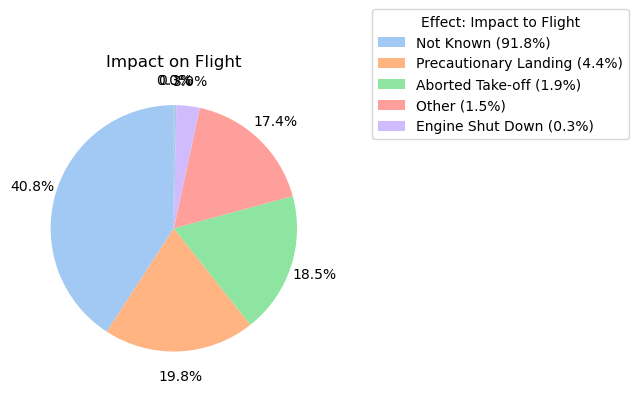

In [32]:
plt.figure(figsize=(6, 4))
flight_counts = data['Effect: Impact to flight'].value_counts()
percentages = flight_counts / flight_counts.sum() * 100 

plt.pie( phase_counts,
    autopct='%1.1f%%', 
    pctdistance=1.2,
    startangle=90,  
    colors=sns.color_palette("pastel", len(flight_counts))  )

plt.legend(
    labels=[f'{label} ({percent:.1f}%)' for label, percent in zip(flight_counts.index, percentages)],
    loc="center right",
    bbox_to_anchor=(2,1),
    title="Effect: Impact to Flight")

plt.title('Impact on Flight')
plt.show()

### Q11. Effect of Strike at Different Altitude

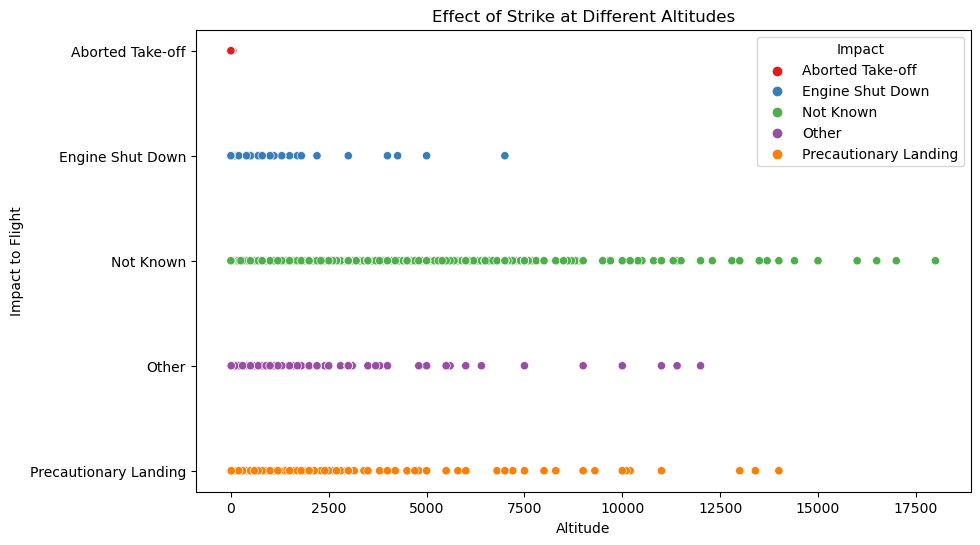

In [38]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feet above ground', y='Effect: Impact to flight', data=data, hue='Effect: Impact to flight', palette='Set1')
plt.title('Effect of Strike at Different Altitudes')
plt.xlabel('Altitude')
plt.ylabel('Impact to Flight')
plt.legend(title='Impact')
plt.show()


### Q12. Were Pilots Informed? & Prior Warning and Effect of Strike Relation

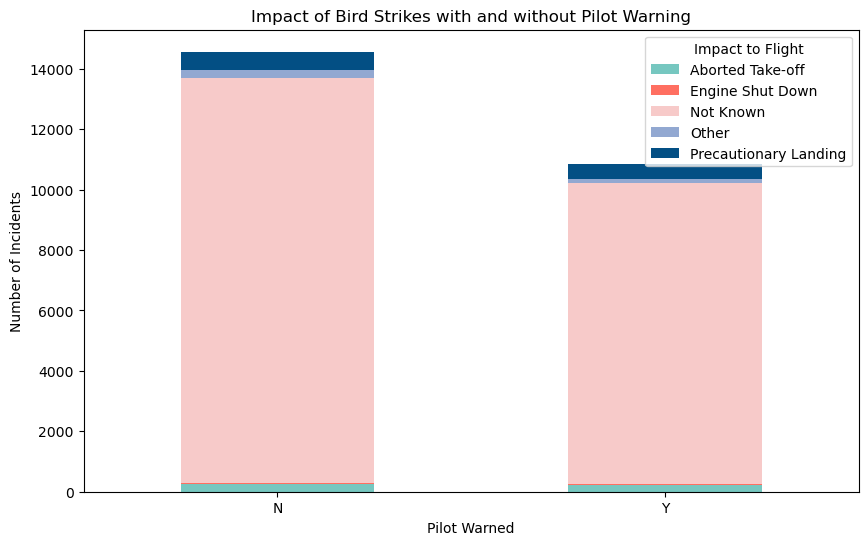

In [42]:

# crosstab to show the relationship between pilot warning and impact
warning_impact = pd.crosstab(data['Pilot warned of birds or wildlife?'], data['Effect: Impact to flight'])

warning_impact.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#76C7C0', '#FF6F61', '#F7CAC9', '#92A8D1', '#034F84'])
plt.title('Impact of Bird Strikes with and without Pilot Warning')
plt.xlabel('Pilot Warned')
plt.ylabel('Number of Incidents')
plt.legend(title='Impact to Flight')
plt.xticks(rotation=0)
plt.show()
